# Final Analysis of WeatherPy



### (1) Based on the Temperature versus Latitude plot, I've concluded the closer you are to 0 degrees Latitude the warmer on average it'll be.


### (2) Based on the the other corresponding plots, I don't believe Wind Speed, Cloudiness, or Humidity are directly related to Latitude.


### (3) I believe that Humidity and Cloudiness may be correlated but would need an analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [4]:
#Set up of Url and data collection table
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "imperial"
counter = 0
dataframe_info = {}

print("Beginning Data Collection Process")
print(f"Estimated Wait Time : {(len(cities)*1.5)/60} Minutes")
print("=================================")

#Iterate over cities to collect json data
for city in cities:

    final_url = f"{base_url}appid={api_key}&q={city}&units={units}"
    
    weather_response = requests.get(final_url)
    weather_json = weather_response.json()
    
    dataframe_info[city] = {"Index" : counter,
                            "JSON Data": weather_json,
                            "Date": "NaN",
                            "City": "NaN",
                            "Country": "NaN",
                            "Latitude": 0.0,
                            "Longitude": 0.0,
                            "Temperature": 0.0,
                            "Humidity": 0.0, 
                            "Clouds": 0.0,
                            "Wind Speed": 0.0
                            }

    try:
        
        dataframe_info[city]["Date"] = weather_json["dt"]
        dataframe_info[city]["City"] = weather_json["name"]
        dataframe_info[city]["Country"] = weather_json["sys"]["country"]
        dataframe_info[city]["Latitude"] = weather_json["coord"]["lat"]
        dataframe_info[city]["Longitude"] = weather_json["coord"]["lon"]
        dataframe_info[city]["Temperature"] = weather_json["main"]["temp"]
        dataframe_info[city]["Humidity"] = weather_json["main"]["humidity"]
        dataframe_info[city]["Clouds"] = weather_json["clouds"]["all"]
        dataframe_info[city]["Wind Speed"] =  weather_json["wind"]["speed"]
        
    except (KeyError, IndexError):
        
        print(f"Error at Trial {counter}, City : {city}, skipping to next Trial.")
        print("-----------------------------------------------------------------")
        continue
        
    else:
        
        print(f"Data Collection Trial {counter} of {len(cities)} for {city}")
        print("-----------------------------------------------------------------")
        
    finally:
        
        counter = counter + 1
        time.sleep(1.5)
        
print("Finished with Data Collection")
print("Thank You for Waiting")

Beginning Data Collection Process
Estimated Wait Time : 16.175 Minutes
Data Collection Trial 0 of 647 for hasaki
-----------------------------------------------------------------
Data Collection Trial 1 of 647 for sitka
-----------------------------------------------------------------
Data Collection Trial 2 of 647 for ziro
-----------------------------------------------------------------
Data Collection Trial 3 of 647 for abnub
-----------------------------------------------------------------
Data Collection Trial 4 of 647 for kaitangata
-----------------------------------------------------------------
Data Collection Trial 5 of 647 for santana
-----------------------------------------------------------------
Data Collection Trial 6 of 647 for vence
-----------------------------------------------------------------
Data Collection Trial 7 of 647 for panjab
-----------------------------------------------------------------
Data Collection Trial 8 of 647 for samana
-----------------------

Data Collection Trial 73 of 647 for tasiilaq
-----------------------------------------------------------------
Data Collection Trial 74 of 647 for narsaq
-----------------------------------------------------------------
Data Collection Trial 75 of 647 for roma
-----------------------------------------------------------------
Data Collection Trial 76 of 647 for atasu
-----------------------------------------------------------------
Data Collection Trial 77 of 647 for huarmey
-----------------------------------------------------------------
Data Collection Trial 78 of 647 for kirakira
-----------------------------------------------------------------
Data Collection Trial 79 of 647 for ushtobe
-----------------------------------------------------------------
Data Collection Trial 80 of 647 for lorengau
-----------------------------------------------------------------
Data Collection Trial 81 of 647 for caravelas
-----------------------------------------------------------------
Data Collec

Data Collection Trial 147 of 647 for sao filipe
-----------------------------------------------------------------
Data Collection Trial 148 of 647 for ribeira grande
-----------------------------------------------------------------
Data Collection Trial 149 of 647 for lang son
-----------------------------------------------------------------
Data Collection Trial 150 of 647 for atambua
-----------------------------------------------------------------
Data Collection Trial 151 of 647 for mubende
-----------------------------------------------------------------
Data Collection Trial 152 of 647 for prince rupert
-----------------------------------------------------------------
Data Collection Trial 153 of 647 for san patricio
-----------------------------------------------------------------
Data Collection Trial 154 of 647 for kampot
-----------------------------------------------------------------
Data Collection Trial 155 of 647 for sovetskiy
--------------------------------------------

Data Collection Trial 219 of 647 for lasa
-----------------------------------------------------------------
Data Collection Trial 220 of 647 for broome
-----------------------------------------------------------------
Data Collection Trial 221 of 647 for almeirim
-----------------------------------------------------------------
Error at Trial 222, City : nizhneyansk, skipping to next Trial.
-----------------------------------------------------------------
Data Collection Trial 223 of 647 for nalut
-----------------------------------------------------------------
Data Collection Trial 224 of 647 for saint pete beach
-----------------------------------------------------------------
Data Collection Trial 225 of 647 for tartagal
-----------------------------------------------------------------
Data Collection Trial 226 of 647 for codrington
-----------------------------------------------------------------
Data Collection Trial 227 of 647 for moose factory
----------------------------------

Data Collection Trial 292 of 647 for forfar
-----------------------------------------------------------------
Data Collection Trial 293 of 647 for somerville
-----------------------------------------------------------------
Data Collection Trial 294 of 647 for rojhan
-----------------------------------------------------------------
Data Collection Trial 295 of 647 for nautla
-----------------------------------------------------------------
Data Collection Trial 296 of 647 for porto san giorgio
-----------------------------------------------------------------
Data Collection Trial 297 of 647 for ancud
-----------------------------------------------------------------
Data Collection Trial 298 of 647 for mobaye
-----------------------------------------------------------------
Data Collection Trial 299 of 647 for flinders
-----------------------------------------------------------------
Data Collection Trial 300 of 647 for arnedo
------------------------------------------------------------

Data Collection Trial 365 of 647 for port alberni
-----------------------------------------------------------------
Data Collection Trial 366 of 647 for kazerun
-----------------------------------------------------------------
Data Collection Trial 367 of 647 for grindavik
-----------------------------------------------------------------
Data Collection Trial 368 of 647 for rorvik
-----------------------------------------------------------------
Data Collection Trial 369 of 647 for noyabrsk
-----------------------------------------------------------------
Data Collection Trial 370 of 647 for coalinga
-----------------------------------------------------------------
Data Collection Trial 371 of 647 for bodo
-----------------------------------------------------------------
Data Collection Trial 372 of 647 for nikki
-----------------------------------------------------------------
Data Collection Trial 373 of 647 for mino
-----------------------------------------------------------------
D

Error at Trial 438, City : viligili, skipping to next Trial.
-----------------------------------------------------------------
Data Collection Trial 439 of 647 for saint-augustin
-----------------------------------------------------------------
Data Collection Trial 440 of 647 for sawtell
-----------------------------------------------------------------
Data Collection Trial 441 of 647 for staraya poltavka
-----------------------------------------------------------------
Data Collection Trial 442 of 647 for mana
-----------------------------------------------------------------
Data Collection Trial 443 of 647 for masyaf
-----------------------------------------------------------------
Data Collection Trial 444 of 647 for shitanjing
-----------------------------------------------------------------
Data Collection Trial 445 of 647 for the valley
-----------------------------------------------------------------
Data Collection Trial 446 of 647 for amazar
----------------------------------

Data Collection Trial 511 of 647 for douentza
-----------------------------------------------------------------
Data Collection Trial 512 of 647 for baghmara
-----------------------------------------------------------------
Data Collection Trial 513 of 647 for taltal
-----------------------------------------------------------------
Data Collection Trial 514 of 647 for halifax
-----------------------------------------------------------------
Data Collection Trial 515 of 647 for ahipara
-----------------------------------------------------------------
Data Collection Trial 516 of 647 for balabac
-----------------------------------------------------------------
Data Collection Trial 517 of 647 for cayenne
-----------------------------------------------------------------
Data Collection Trial 518 of 647 for whangarei
-----------------------------------------------------------------
Data Collection Trial 519 of 647 for balagon
----------------------------------------------------------------

Data Collection Trial 584 of 647 for bay city
-----------------------------------------------------------------
Data Collection Trial 585 of 647 for truro
-----------------------------------------------------------------
Error at Trial 586, City : is, skipping to next Trial.
-----------------------------------------------------------------
Data Collection Trial 587 of 647 for tonj
-----------------------------------------------------------------
Data Collection Trial 588 of 647 for akyab
-----------------------------------------------------------------
Data Collection Trial 589 of 647 for alugan
-----------------------------------------------------------------
Data Collection Trial 590 of 647 for matara
-----------------------------------------------------------------
Data Collection Trial 591 of 647 for richards bay
-----------------------------------------------------------------
Data Collection Trial 592 of 647 for north little rock
--------------------------------------------------

In [5]:
#Create and store the data
weather_df = pd.DataFrame(dataframe_info[city] for city in dataframe_info.keys())
weather_df.to_csv(output_data_file)
#weather_df

In [6]:
#Clean up any unfounds
cleaned_df = weather_df[weather_df["JSON Data"] != {'cod': '404', 'message': 'city not found'}]
cleaned_df = cleaned_df[["City","Country","Date","Latitude","Longitude","Temperature","Humidity","Clouds","Wind Speed"]]
cleaned_df.to_csv("output_data/weather_data.csv")
cleaned_df

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
0,Hasaki,JP,1660681118,35.7333,140.8333,81.00,86.0,99.0,1.48
1,Sitka,US,1660681120,57.0531,-135.3300,66.09,59.0,100.0,14.97
2,Ziro,IN,1660681122,27.6333,93.8333,61.12,99.0,95.0,0.85
3,Abnūb,EG,1660681124,27.2696,31.1511,89.69,25.0,0.0,11.77
4,Kaitangata,NZ,1660681126,-46.2817,169.8464,47.75,96.0,100.0,0.29
...,...,...,...,...,...,...,...,...,...
642,Flin Flon,CA,1660682291,54.7682,-101.8650,85.84,37.0,40.0,12.66
643,Aban,RU,1660682293,56.6700,96.0600,47.91,97.0,100.0,9.44
644,Mae Sot,TH,1660682295,16.7167,98.5667,77.41,99.0,100.0,2.15
645,Amga,RU,1660682297,60.8953,131.9608,53.64,86.0,87.0,2.55


In [7]:
#Describe the data
cleaned_df.describe()

,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,21.717431,16.921659,69.420953,69.483278,53.959866,8.000234
std,32.897044,90.012228,14.797378,22.684986,39.884738,5.004695
min,-54.800000,-179.166700,33.350000,4.000000,0.000000,0.000000
25%,-3.820950,-63.443750,58.717500,57.000000,12.000000,4.365000
50%,27.675000,19.868450,71.230000,74.000000,58.000000,6.955000
75%,47.686475,97.776375,80.507500,88.000000,99.000000,10.795000
max,78.218600,179.316700,103.860000,100.000000,100.000000,26.510000


In [8]:
#Drop any with 100% Humidity
cleaned_df = cleaned_df[cleaned_df["Humidity"] != 100.0]
cleaned_df

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Clouds,Wind Speed
0,Hasaki,JP,1660681118,35.7333,140.8333,81.00,86.0,99.0,1.48
1,Sitka,US,1660681120,57.0531,-135.3300,66.09,59.0,100.0,14.97
2,Ziro,IN,1660681122,27.6333,93.8333,61.12,99.0,95.0,0.85
3,Abnūb,EG,1660681124,27.2696,31.1511,89.69,25.0,0.0,11.77
4,Kaitangata,NZ,1660681126,-46.2817,169.8464,47.75,96.0,100.0,0.29
...,...,...,...,...,...,...,...,...,...
642,Flin Flon,CA,1660682291,54.7682,-101.8650,85.84,37.0,40.0,12.66
643,Aban,RU,1660682293,56.6700,96.0600,47.91,97.0,100.0,9.44
644,Mae Sot,TH,1660682295,16.7167,98.5667,77.41,99.0,100.0,2.15
645,Amga,RU,1660682297,60.8953,131.9608,53.64,86.0,87.0,2.55


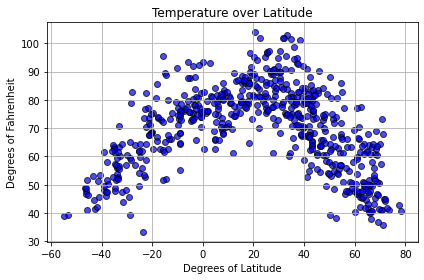

In [9]:
#Create a Scatterplot for Latitude vs Temperature
plt.scatter(cleaned_df["Latitude"],cleaned_df["Temperature"],color = "blue",alpha = .7,edgecolors = "black")

plt.title("Temperature over Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Degrees of Fahrenheit")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/temp_lat.jpeg")
plt.show()

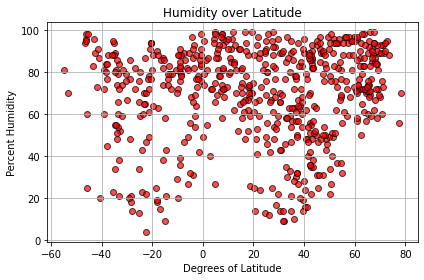

In [10]:
#Create a Scatterplot for Latitude vs Humidity
plt.scatter(cleaned_df["Latitude"],cleaned_df["Humidity"],color = "red",alpha = .7,edgecolors = "black")

plt.title("Humidity over Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Humidity")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/humid_lat.jpeg")
plt.show()

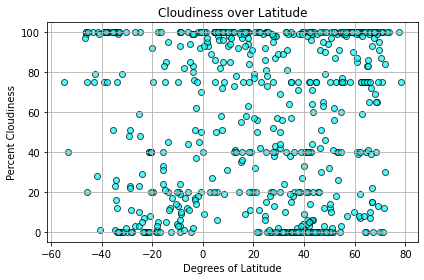

In [11]:
#Create a Scatterplot for Latitude vs Cloudiness
plt.scatter(cleaned_df["Latitude"],cleaned_df["Clouds"],color = "cyan",alpha = .7,edgecolors = "black")

plt.title("Cloudiness over Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Cloudiness")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/cloud_lat.jpeg")
plt.show()

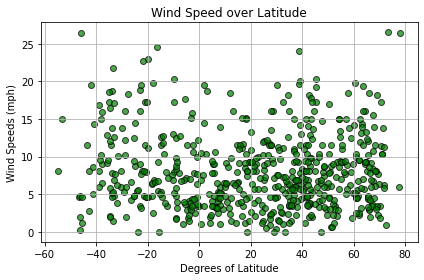

In [12]:
#Create a Scatterplot for Latitude vs Wind Speeds
plt.scatter(cleaned_df["Latitude"],cleaned_df["Wind Speed"],color = "green",alpha = .7,edgecolors = "black")

plt.title("Wind Speed over Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speeds (mph)")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/wind_lat.jpeg")
plt.show()

In [13]:
#Create a DataFrame for Northern Hemisphere
northern_df = cleaned_df[cleaned_df["Latitude"] > 0.0]
#northern_df

#Create a DataFrame for Southern Hemisphere
southern_df = cleaned_df[cleaned_df["Latitude"] < 0.0]
#southern_df

The r value is : -0.6709943307539863


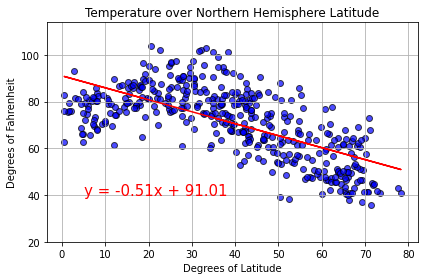

In [14]:
#Create Linear Regression for Northern Hemisphere (Latitude vs Temperature)
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "blue",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")

plt.title("Temperature over Northern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Degrees of Fahrenheit")

plt.ylim(20,max(y_values)+10)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/temp_north_lat.jpeg")
plt.show()

The r value is : 0.7836593401653283


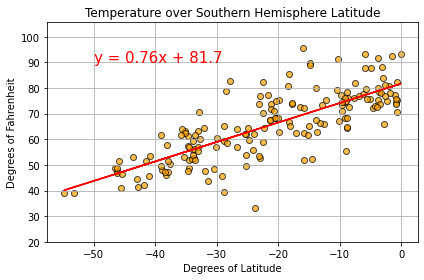

In [15]:
#Create Linear Regression for Southern Hemisphere (Latitude vs Temperature)
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "orange",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

plt.title("Temperature over Southern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Degrees of Fahrenheit")

plt.ylim(20,max(y_values)+10)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/temp_south_lat.jpeg")
plt.show()

The r value is : 0.05419993540175332


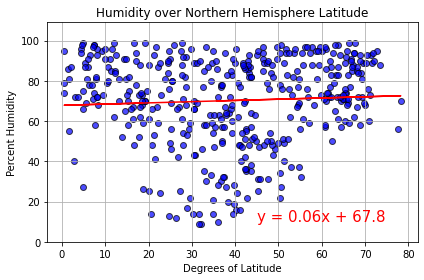

In [16]:
#Create Linear Regression for Northern Hemisphere (Latitude vs Humidity)
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "blue",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.title("Humidity over Northern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Humidity")

plt.ylim(0,max(y_values)+10)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/humid_north_lat.jpeg")
plt.show()

The r value is : 0.0007031003118909534


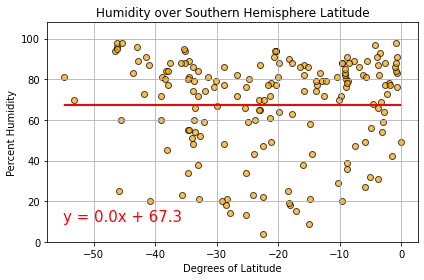

In [17]:
#Create Linear Regression for Southern Hemisphere (Latitude vs Humidity)
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "orange",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

plt.title("Humidity over Southern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Humidity")

plt.ylim(0,max(y_values)+10)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/humid_south_lat.jpeg")
plt.show()

The r value is : -0.018302069240252107


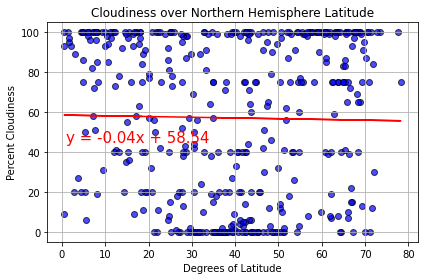

In [18]:
#Create Linear Regression for Northern Hemisphere (Latitude vs Cloudiness)
x_values = northern_df["Latitude"]
y_values = northern_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "blue",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,45),fontsize=15,color="red")

plt.title("Cloudiness over Northern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Cloudiness")

plt.ylim(-5,max(y_values)+5)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/cloud_north_lat.jpeg")
plt.show()

The r value is : -0.16158666164809155


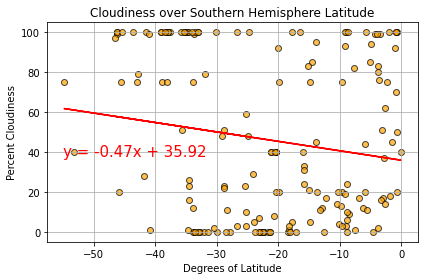

In [19]:
#Create Linear Regression for Southern Hemisphere (Latitude vs Cloudiness)
x_values = southern_df["Latitude"]
y_values = southern_df["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "orange",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")

plt.title("Cloudiness over Southern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Cloudiness")

plt.ylim(-5,max(y_values)+5)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/cloud_south_lat.jpeg")
plt.show()

The r value is : 0.14825699809937604


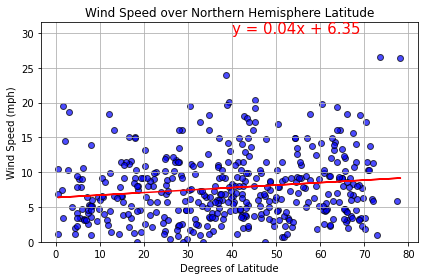

In [20]:
#Create Linear Regression for Northern Hemisphere (Latitude vs Wind Speed)
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "blue",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

plt.title("Wind Speed over Northern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(0,max(y_values)+5)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/wind_north_lat.jpeg")
plt.show()

The r value is : -0.17736073871271713


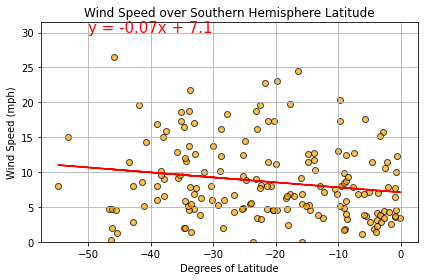

In [21]:
#Create Linear Regression for Southern Hemisphere (Latitude vs Wind Speed)
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color = "orange",alpha = .7,edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.title("Wind Speed over Southern Hemisphere Latitude")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")

plt.ylim(0,max(y_values)+5)

print(f"The r value is : {rvalue}")

plt.grid()
plt.tight_layout()
plt.savefig("output_data/wind_south_lat.jpeg")
plt.show()